In [1]:
import os
import numpy as np
import pandas as pd

import pickle
import time


import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib import cm
import seaborn as sns

# some prob need fitting now... 
#from utils_dce import test_val_train
from utils_rf import get_Xy_tt

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

from IPython.display import clear_output

In [410]:
# # should just be a function you cna usee in feature selection script and hyper parameter search script. Maybe have a util_rf

# # get df:
# pkl_file = open('/home/simon/Documents/Articles/conflict_prediction/data/computerome/currents/preds_df.pkl', 'rb')
# #pkl_file = open('/home/projects/ku_00017/data/generated/currents/preds_df.pkl', 'rb')
# df_merged = pickle.load(pkl_file)
# pkl_file.close()

# #df_merged = pd.merge(dce_pred_df, cm_pred_df, how = 'left', on = ['id', 'pg_id', 'train', 'X'])

# feature_set = [ 'dce_mu', 'dce_mu_slope', 'dce_mu_acc', 'dce_mu_mass',
#                 'dce_mu_s', 'dce_mu_s_slope','dce_mu_s_acc', 'dce_mu_s_mass',
#                 'dce_mu_l', 'dce_mu_l_slope', 'dce_mu_l_acc', 'dce_mu_l_mass',
#                 'dce_var', 'dce_var_s', 'dce_var_l', 
#                 'cm_mu', 'cm_mu_slope', 'cm_mu_acc', 'cm_mu_mass',
#                 'cm_mu_s', 'cm_mu_s_slope', 'cm_mu_s_acc', 'cm_mu_s_mass',
#                 'cm_mu_l', 'cm_mu_l_slope', 'cm_mu_l_acc', 'cm_mu_l_mass',
#                 'cm_var', 'cm_var_s', 'cm_var_l']


# X_train = df_merged[df_merged['train'] == 1][feature_set] 
    
# y_train = (df_merged[df_merged['train'] == 1]['ged_best_sb'] > 0) * 1

# X_test = df_merged[df_merged['train'] == 0][feature_set] # val, not test

# y_test = (df_merged[df_merged['train'] == 0]['ged_best_sb'] > 0) * 1 # val, not test




# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)

(450648, 30)
(450648,)
(61452, 30)
(61452,)


In [411]:
# get df:
pkl_file = open('/home/simon/Documents/Articles/conflict_prediction/data/computerome/currents/selected_features.pkl', 'rb')
#pkl_file = open('/home/projects/ku_00017/data/generated/currents/selected_features.pkl', 'rb')
selected_features = pickle.load(pkl_file)
pkl_file.close()

FileNotFoundError: [Errno 2] No such file or directory: '/home/simon/Documents/Articles/conflict_prediction/data/computerome/currents/selected_features.pkl'

In [ ]:
X_train, y_train, X_test, y_test = get_Xy_tt(local = False)

In [ ]:
#Shoul be own script

In [4]:
# chosen_features = []
# chosen_features_ap = []

# n_feat = X_train.columns.shape[0]

# for j in range(n_feat): # det her skal jo egen ligt være et while loop - while improving

#     x_list = []
#     AP_val_list = []
#     AP_train_list = []

#     mask = np.isin(X_train.columns, chosen_features, invert = True)
#     n_i = mask.sum()
#     for i, x in enumerate(X_train.columns[mask]): # is the index of the (new) feature tested

#         #x = X_train.columns[i]
#         X_temp = chosen_features + [x]

#         print(f'{i+1}/{n_i}, Running with: {X_temp}')

#         model_tmp = RandomForestClassifier(n_estimators=110, max_depth = 4, min_samples_split = 3, random_state=42, n_jobs= 4) # HP from quick naive search
#         #model_tmp = RandomForestClassifier(n_estimators=10, max_depth = 4, min_samples_split = 2, random_state=42, n_jobs= 4) # for speed.. 

#         model_tmp.fit(X_train[X_temp], y_train)

#         y_train_pred = model_tmp.predict_proba(X_train[X_temp])[:,1]
#         y_val_pred = model_tmp.predict_proba(X_test[X_temp])[:,1]

#         x_list.append(x)
#         AP_train_list.append(metrics.average_precision_score(y_train, y_train_pred))
#         AP_val_list.append(metrics.average_precision_score(y_test, y_val_pred))

#         print(f'train: {AP_train_list[i]}, test: {AP_val_list[i]}\n')

#     df_temp = pd.DataFrame({'x': x_list, 'AP': AP_val_list})
#     chosen_features.append(df_temp.sort_values('AP', ascending= False).iloc[0]['x'])
#     chosen_features_ap.append(df_temp.sort_values('AP', ascending= False).iloc[0]['AP'])

#     print(f'round {j+1}/{n_feat}. choosenfeatures: {chosen_features} w/ AP: {chosen_features_ap[j]}\n\n')

#     # the break sould be here somewhere...



pe', 'dce_var_l', 'dce_var', 'cm_mu_l_acc', 'cm_var', 'dce_mu_l_acc', 'cm_mu_l_slope']
train: 0.39685217659871186, test: 0.21446719096850403

9/9, Running with: ['cm_mu_l', 'dce_mu', 'dce_mu_s', 'cm_mu_l_mass', 'dce_mu_s_acc', 'dce_mu_l', 'cm_mu_s_slope', 'dce_mu_slope', 'cm_mu_s_mass', 'dce_mu_acc', 'cm_var_l', 'dce_var_s', 'dce_mu_l_mass', 'cm_mu_slope', 'dce_mu_s_slope', 'dce_mu_l_slope', 'dce_var_l', 'dce_var', 'cm_mu_l_acc', 'cm_var', 'dce_mu_l_acc', 'cm_var_s']
train: 0.39489972185744215, test: 0.21249494263438645

round 22/30. choosenfeatures: ['cm_mu_l', 'dce_mu', 'dce_mu_s', 'cm_mu_l_mass', 'dce_mu_s_acc', 'dce_mu_l', 'cm_mu_s_slope', 'dce_mu_slope', 'cm_mu_s_mass', 'dce_mu_acc', 'cm_var_l', 'dce_var_s', 'dce_mu_l_mass', 'cm_mu_slope', 'dce_mu_s_slope', 'dce_mu_l_slope', 'dce_var_l', 'dce_var', 'cm_mu_l_acc', 'cm_var', 'dce_mu_l_acc', 'cm_mu_l_slope'] w/ AP: 0.21446719096850403


1/8, Running with: ['cm_mu_l', 'dce_mu', 'dce_mu_s', 'cm_mu_l_mass', 'dce_mu_s_acc', 'dce_mu_l', '

In [ ]:
best_features = pd.DataFrame({'features' : chosen_features, 'AP' : chosen_features_ap})
best_features

In [9]:
os.system("mpg123 /home/simon/Music/sounds/FF7Victory.mp3")

0

In [ ]:
# the thing above should be its own script and pickle stuff...

In [ ]:
# new naive parameter search.

In [409]:
n_rounds = 100

best_features = ['cm_mu_l', 'dce_mu', 'dce_mu_s', 'cm_mu_l_mass'] # should come from above.. 

max_depth_list = [] # a bit redundent now, but hey.
n_estimators_list = []
min_samples_split_list = []
criterion_list = []
class_weight_list = []
max_features_list = []

# see https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html for more.

train_preds = []
test_preds = []

AUC_train_list = []
AP_train_list = []
BS_train_list = []
AUC_test_list = [] 
AP_test_list = []
BS_test_list = []
W_feature0_list = []
W_feature1_list = []

print('Beginning loop')
for i in range(n_rounds):

    # Constant hyper paremeters:
    max_depth = 4 #np.random.randint(2,4) # you only have four feautures, and all the top 100 models uses all four. Just set it to 4.
    criterion = 'gini' #['gini', 'entropy'][np.random.randint(0,2)] # bianry: one or the other. Gini just did wastly better

    # Variable hyper parameters
    n_estimators = np.random.randint(100,150) # performanece seem to drop after 150 which is a bit stange but fine.
    min_samples_split = np.random.randint(2,6) # seems fine down here
    # so you experiments show that is should be something like y = x * 0.52.
    # Where y = w1 and x = w0. And this is a bot wierd since y is the minority class. but we'll se when the full data comes. 
    # Check again when full data comes
    # W_feature0 = (np.random.randint(0,10,1)*0.1)[0] #(np.random.randint(1,10,1)*0.1)[0] # value between 0.1 and 1 # wierd that his should be largest according to your tests
    # W_feature1 = (np.random.randint(1,10,1)*0.1)[0] #(np.random.randint(1,10,1)*0.1)[0] # and wierd that this should be smallest..
    
    W_feature0 = (np.random.randint(2,11,1)*0.1)[0] # uniform from 0.2-1. prob could be justone number but where's the fun in that..
    W_feature1 = W_feature0 * 0.52 + np.random.randn() * 0.01 # function with a bit of random noise
    class_weight = {0:W_feature0, 1:W_feature1} 

    max_features = ['auto', 'sqrt', 'log2'][np.random.randint(0,3)]

    
    model = RandomForestClassifier( n_estimators=n_estimators, criterion = criterion, max_depth = max_depth, 
                                    min_samples_split= min_samples_split, class_weight = class_weight, 
                                    random_state=42, n_jobs= 4)
    
    model.fit(X_train[best_features], y_train)

    y_train_pred = model.predict_proba(X_train[best_features])[:,1]
    y_test_pred = model.predict_proba(X_test[best_features])[:,1]

    AUC_train_list.append(metrics.roc_auc_score(y_train, y_train_pred))
    AP_train_list.append(metrics.average_precision_score(y_train, y_train_pred))
    BS_train_list.append(metrics.brier_score_loss(y_train, y_train_pred))

    AUC_test_list.append(metrics.roc_auc_score(y_test, y_test_pred))
    AP_test_list.append(metrics.average_precision_score(y_test, y_test_pred))
    BS_test_list.append(metrics.brier_score_loss(y_test, y_test_pred))
    
    
    n_estimators_list.append(n_estimators)
    max_depth_list.append(max_depth)
    min_samples_split_list.append(min_samples_split)
    criterion_list.append(criterion)
    class_weight_list.append(class_weight)
    max_features_list.append(max_features)

    W_feature0_list.append(W_feature0) # just for plottting
    W_feature1_list.append(W_feature1)
    
    train_preds.append(y_train_pred)
    test_preds.append(y_test_pred)


    print(f'{i+1}/{n_rounds} done')
    clear_output(wait = True)

100/100 done


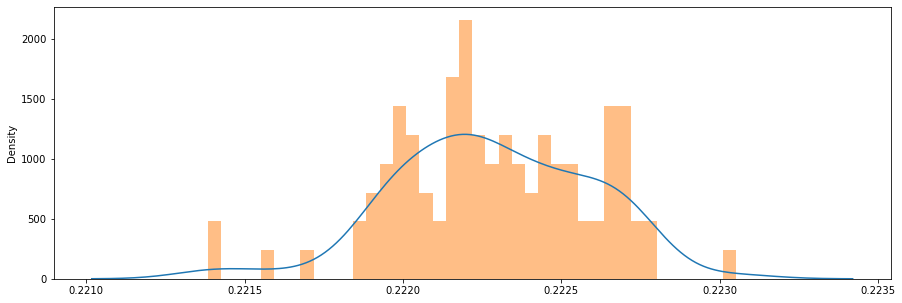

In [412]:
plt.figure(figsize = [15,5])
plt.hist(AP_test_list, bins = 40, density=True, alpha = 0.5, label = 'test', color = 'C1')
sns.kdeplot(AP_test_list)
plt.show()

In [413]:
hp_df = pd.DataFrame({'n_estimators' : n_estimators_list, 'max_depth' : max_depth_list, 'min_samples_split' : min_samples_split_list,
                      'w0' : W_feature0_list, 'w1' : W_feature1_list, 
                      'criterion' : criterion_list, 'class_weight' : class_weight_list, 'max_features' : max_features_list,  
                      'test_preds' : test_preds, 'AP' : AP_test_list})

No handles with labels found to put in legend.


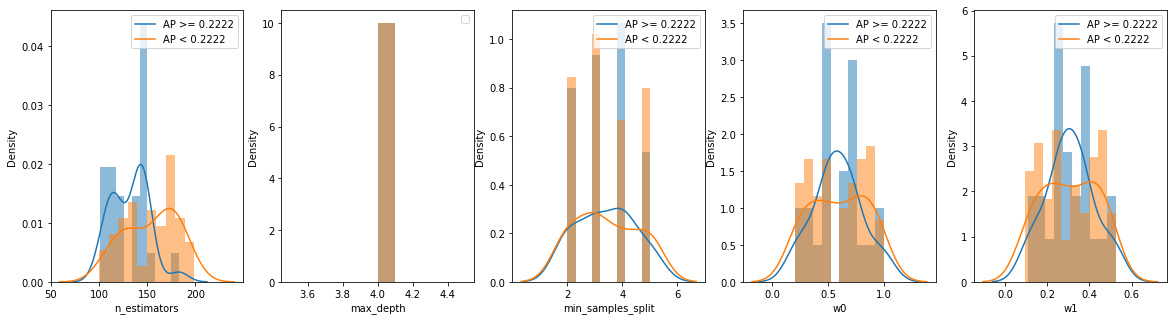

In [429]:
plt.figure(figsize = [20,5])

for i,j in enumerate(hp_df.columns[:5]):
    plt.subplot(1,5,i+1)

    sns.kdeplot(hp_df[hp_df['AP'] >= 0.2225][j], label = 'AP >= 0.2222', bw_method= 0.5) 
    sns.kdeplot(hp_df[hp_df['AP'] < 0.2225][j], label = 'AP < 0.2222', bw_method= 0.5)

    plt.hist(hp_df[hp_df['AP'] >= 0.2225][j], color = 'C0', density = True, alpha = 0.5) 
    plt.hist(hp_df[hp_df['AP'] < 0.2225][j], color = 'C1', density = True, alpha = 0.5)

    plt.legend()

plt.show()

#  I have looked at hte other parameters and there does not appear to be a relationship

# plt.scatter(hp_df['w0'], hp_df['w1'], c= hp_df['AP'])
# plt.xlabel('w0')
# plt.ylabel('w1')

# x_grid = np.arange(0.1,1.1,0.1)
# y_grid = x_grid * 0.52

# plt.plot(x_grid, y_grid)

# plt.show()

good values:
n_estimators: 

In [427]:
hp_df.sort_values('AP', ascending= False)[:5]

,n_estimators,max_depth,min_samples_split,w0,w1,criterion,class_weight,max_features,test_preds,AP
96,144,4,2,0.6,0.324153,gini,"{0: 0.6000000000000001, 1: 0.3241533676700143}",auto,"[0.0006923150942952252, 0.0006923150942952252,...",0.223053
94,112,4,5,1.0,0.512531,gini,"{0: 1.0, 1: 0.5125313059298752}",auto,"[0.0006357978167810981, 0.0006357978167810981,...",0.222779
47,142,4,3,0.6,0.313495,gini,"{0: 0.6000000000000001, 1: 0.31349493047577653}",log2,"[0.0006758271539819386, 0.0006758271539819386,...",0.222777
54,143,4,4,0.5,0.260198,gini,"{0: 0.5, 1: 0.2601977190486825}",sqrt,"[0.0006746078339793112, 0.0006746078339793112,...",0.222757
80,114,4,4,0.2,0.107150,gini,"{0: 0.2, 1: 0.10714959806234159}",log2,"[0.0006571632877621629, 0.0006571632877621629,...",0.222754


In [ ]:
os.system("mpg123 /home/simon/Music/sounds/FF7Victory.mp3")

0.4

# old:

In [46]:
n_rounds = 1000

n_estimators_list = []
max_depth_list = []
min_samples_split_list = []
# see https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html for more.

train_preds = []
test_preds = []

AUC_train_list = []
AP_train_list = []
BS_train_list = []
AUC_test_list = [] 
AP_test_list = []
BS_test_list = []

print('Begining loop')
for i in range(n_rounds):

    n_estimators = np.random.randint(32,128)
    max_depth = np.random.randint(2,8)
    min_samples_split = np.random.randint(2,8)
    
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth = max_depth, min_samples_split= min_samples_split, random_state=42, n_jobs= -1)
    
    model.fit(X_train, y_train)

    y_train_pred = model.predict_proba(X_train)[:,1]
    y_test_pred = model.predict_proba(X_test)[:,1]

    AUC_train_list.append(metrics.roc_auc_score(y_train, y_train_pred))
    AP_train_list.append(metrics.average_precision_score(y_train, y_train_pred))
    BS_train_list.append(metrics.brier_score_loss(y_train, y_train_pred))

    AUC_test_list.append(metrics.roc_auc_score(y_test, y_test_pred))
    AP_test_list.append(metrics.average_precision_score(y_test, y_test_pred))
    BS_test_list.append(metrics.brier_score_loss(y_test, y_test_pred))
    
    
    n_estimators_list.append(n_estimators)
    max_depth_list.append(max_depth)
    min_samples_split_list.append(min_samples_split)
    
    train_preds.append(y_train_pred)
    test_preds.append(y_test_pred)


    print(f'{i+1}/{n_rounds} done')
    clear_output(wait = True)

1000/1000 done


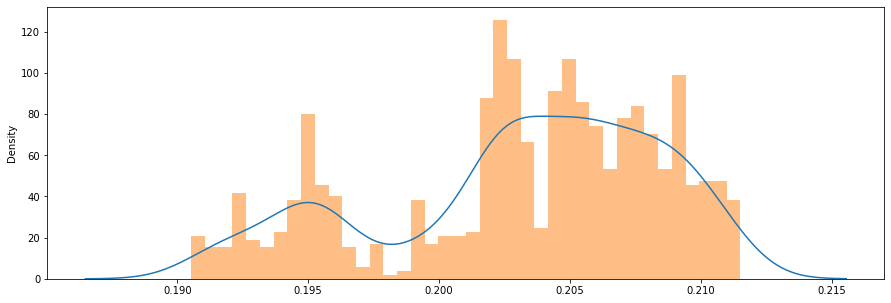

In [48]:
plt.figure(figsize = [15,5])
# plt.hist(AP_train_list, bins = 40, density=True, alpha = 0.5, label = 'train', color = 'C0')
# sns.kdeplot(AP_train_list)
plt.hist(AP_test_list, bins = 40, density=True, alpha = 0.5, label = 'test', color = 'C1')
sns.kdeplot(AP_test_list)
plt.show()

In [84]:
hp_df = pd.DataFrame({'n_estimators' : n_estimators_list, 'max_depth' : max_depth_list, 'min_samples_split' : min_samples_split_list, 'test_preds' : test_preds, 'AP' : AP_test_list})

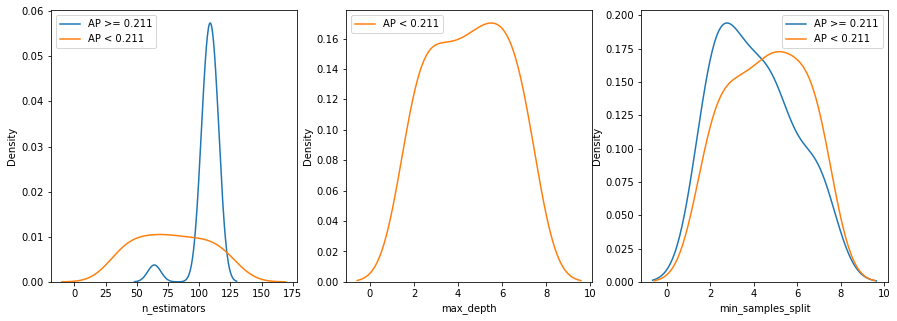

In [90]:
plt.figure(figsize = [15,5])

for i,j in enumerate(hp_df.columns[:3]):
    plt.subplot(1,3,i+1)

    sns.kdeplot(hp_df[hp_df['AP'] >= 0.211][j], label = 'AP >= 0.211', bw_method= 0.5) 
    sns.kdeplot(hp_df[hp_df['AP'] < 0.211][j], label = 'AP < 0.211', bw_method= 0.5)
    #sns.kdeplot(hp_df[hp_df['AP'] >= 0.205][j], label = 'AP < 0.205', bw_method= 0.5)
    #sns.kdeplot(hp_df[hp_df['AP'] < 0.200][j], label = 'AP < 0.200', bw_method= 0.5)


    plt.legend()

plt.show()

In [93]:
hp_df.sort_values('AP', ascending= False)[:10]

,n_estimators,max_depth,min_samples_split,test_preds,AP
404,110,4,3,"[0.000742947052696845, 0.000742947052696845, 0...",0.211521
138,111,4,2,"[0.0007421886673556284, 0.0007421886673556284,...",0.211504
644,111,4,2,"[0.0007421886673556283, 0.0007421886673556283,...",0.211504
682,111,4,5,"[0.0007421886673556284, 0.0007421886673556284,...",0.211504
123,111,4,2,"[0.0007421886673556283, 0.0007421886673556283,...",0.211504
378,113,4,7,"[0.0007427928044344482, 0.0007427928044344482,...",0.211491
475,107,4,2,"[0.0007476100430834702, 0.0007476100430834702,...",0.211441
881,107,4,3,"[0.0007476100430834702, 0.0007476100430834702,...",0.211441
536,114,4,3,"[0.0007433756605784805, 0.0007433756605784805,...",0.211406
450,104,4,5,"[0.0007482669400912187, 0.0007482669400912187,...",0.211357


Feature selection with Feature importance

In [94]:
rf = RandomForestClassifier(n_estimators=110, max_depth = 4, min_samples_split = 3)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_split=3, n_estimators=110)

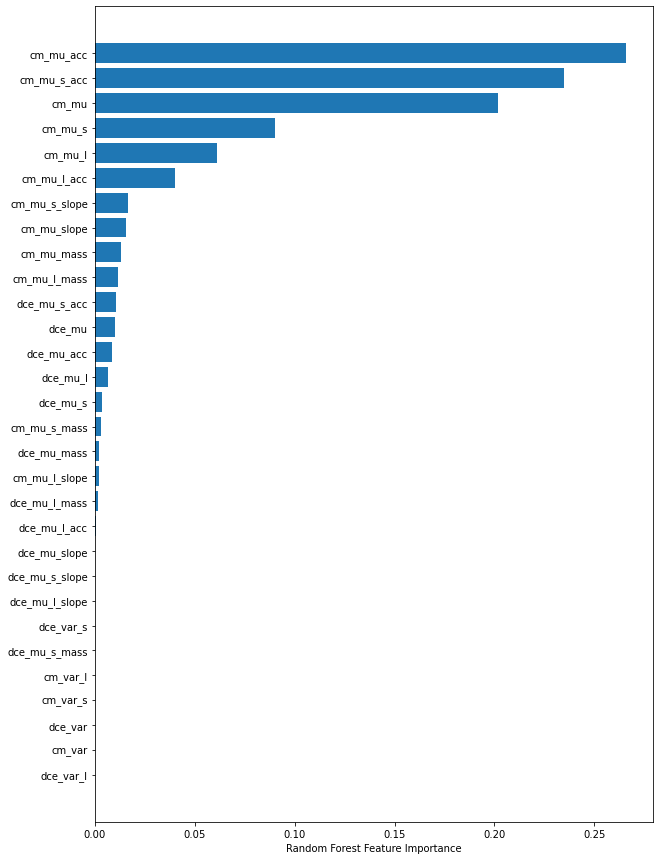

In [113]:
plt.figure(figsize= [10,15])

sorted_idx = rf.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.show()

In [121]:
# selection loop:

start_time = time.time()

AUC_train_list = []
AP_train_list = []
BS_train_list = []

AUC_val_list = []
AP_val_list = []
BS_val_list = []

n_feat = X_train.columns.shape[0]

for i in np.arange(1, n_feat + 1, 1):
    
    selected_features = X_train.columns[sorted_idx][-i:]
    X_train_slim = X_train[selected_features]
    X_val_slim = X_test[selected_features]
    
    model_tmp = RandomForestClassifier(n_estimators=110, max_depth = 4, min_samples_split = 3, random_state=42, n_jobs= 4)
    model_tmp.fit(X_train_slim, y_train)
    
    y_train_pred = model_tmp.predict_proba(X_train_slim)[:,1]
    y_val_pred = model_tmp.predict_proba(X_val_slim)[:,1]
    
    AUC_train_list.append(metrics.roc_auc_score(y_train, y_train_pred))
    AP_train_list.append(metrics.average_precision_score(y_train, y_train_pred))
    BS_train_list.append(metrics.brier_score_loss(y_train, y_train_pred))

    AUC_val_list.append(metrics.roc_auc_score(y_test, y_val_pred))
    AP_val_list.append(metrics.average_precision_score(y_test, y_val_pred))
    BS_val_list.append(metrics.brier_score_loss(y_test, y_val_pred))
    
    print(f'{i}/{n_feat} AP (val): {AP_val_list[i-1]}, using {selected_features}\n')
    

end_time = time.time()
run_time = (end_time - start_time)/60
print(f'minutes to run: {run_time:.2}')

1/30 AP (val): 0.05763825770967397, using Index(['cm_mu_acc'], dtype='object')

2/30 AP (val): 0.06131566857076098, using Index(['cm_mu_s_acc', 'cm_mu_acc'], dtype='object')

3/30 AP (val): 0.17351832938456746, using Index(['cm_mu', 'cm_mu_s_acc', 'cm_mu_acc'], dtype='object')

4/30 AP (val): 0.18054114217889422, using Index(['cm_mu_s', 'cm_mu', 'cm_mu_s_acc', 'cm_mu_acc'], dtype='object')

5/30 AP (val): 0.1823483050739219, using Index(['cm_mu_l', 'cm_mu_s', 'cm_mu', 'cm_mu_s_acc', 'cm_mu_acc'], dtype='object')

6/30 AP (val): 0.19274493196153542, using Index(['cm_mu_l_acc', 'cm_mu_l', 'cm_mu_s', 'cm_mu', 'cm_mu_s_acc',
       'cm_mu_acc'],
      dtype='object')

7/30 AP (val): 0.19157452368122818, using Index(['cm_mu_s_slope', 'cm_mu_l_acc', 'cm_mu_l', 'cm_mu_s', 'cm_mu',
       'cm_mu_s_acc', 'cm_mu_acc'],
      dtype='object')

8/30 AP (val): 0.19143714593184244, using Index(['cm_mu_slope', 'cm_mu_s_slope', 'cm_mu_l_acc', 'cm_mu_l', 'cm_mu_s',
       'cm_mu', 'cm_mu_s_acc', 'cm_mu_

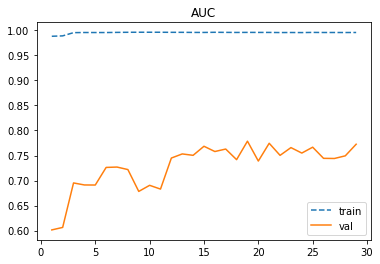

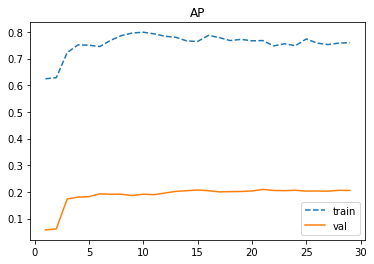

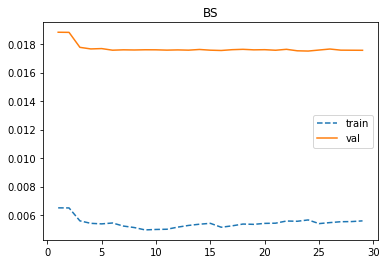

In [123]:
grid = np.arange(1,n_feat,1)

plt.title('AUC')
plt.plot(grid, AUC_train_list, '--', label = 'train')
plt.plot(grid, AUC_val_list,  '-', label = 'val')
plt.legend()
plt.show()

plt.title('AP')
plt.plot(grid, AP_train_list, '--', label = 'train')
plt.plot(grid, AP_val_list, '-', label = 'val')

plt.legend()
plt.show()

plt.title('BS')
plt.plot(grid, BS_train_list, '--', label = 'train')
plt.plot(grid, BS_val_list, '-', label = 'val')
plt.legend()
plt.show()

Feature selection with Feature permutation

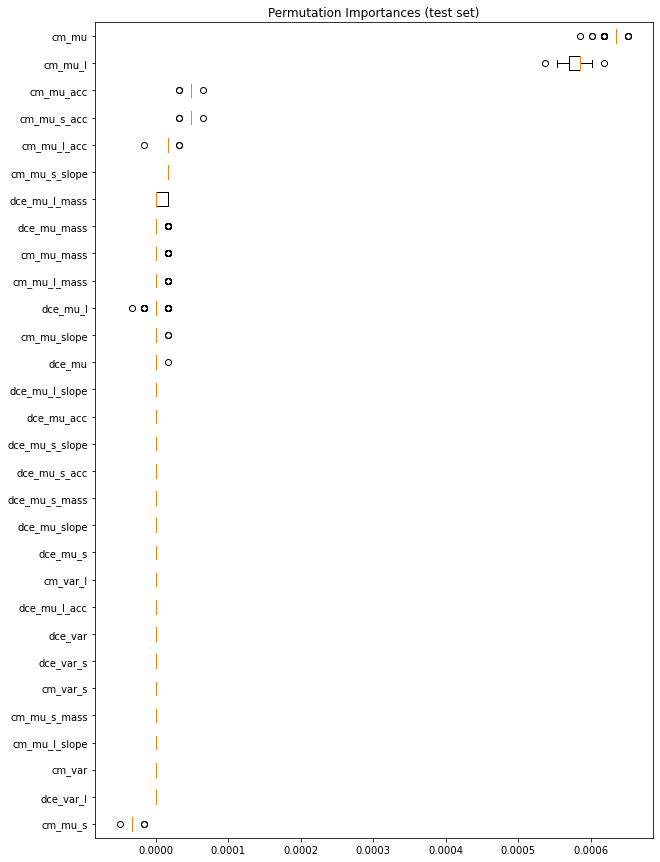

In [124]:
# permutation importance

from sklearn.inspection import permutation_importance
result = permutation_importance(rf, X_test, y_test, n_repeats=100, random_state=42, n_jobs=4)

sorted_idx = result.importances_mean.argsort()

plt.figure(figsize= [10,15])

plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx])

plt.title("Permutation Importances (test set)")
plt.show()

In [127]:
# selection loop:

start_time = time.time()

AUC_train_list = []
AP_train_list = []
BS_train_list = []

AUC_val_list = []
AP_val_list = []
BS_val_list = []

n_feat = X_train.columns.shape[0]

for i in np.arange(1, n_feat + 1, 1):
    
    selected_features = X_train.columns[sorted_idx][-i:]
    X_train_slim = X_train[selected_features]
    X_val_slim = X_test[selected_features]
    
    model_tmp = RandomForestClassifier(n_estimators=110, max_depth = 4, min_samples_split = 3, random_state=42, n_jobs= 4)
    model_tmp.fit(X_train_slim, y_train)
    
    y_train_pred = model_tmp.predict_proba(X_train_slim)[:,1]
    y_val_pred = model_tmp.predict_proba(X_val_slim)[:,1]
    
    AUC_train_list.append(metrics.roc_auc_score(y_train, y_train_pred))
    AP_train_list.append(metrics.average_precision_score(y_train, y_train_pred))
    BS_train_list.append(metrics.brier_score_loss(y_train, y_train_pred))

    AUC_val_list.append(metrics.roc_auc_score(y_test, y_val_pred))
    AP_val_list.append(metrics.average_precision_score(y_test, y_val_pred))
    BS_val_list.append(metrics.brier_score_loss(y_test, y_val_pred))
    
    print(f'{i}/{n_feat} AP (val): {AP_val_list[i-1]}, using {selected_features}\n')
    

end_time = time.time()
run_time = (end_time - start_time)/60
print(f'minutes to run: {run_time:.2}')

1/30 AP (val): 0.1787244370384213, using Index(['cm_mu'], dtype='object')

2/30 AP (val): 0.1966447286299493, using Index(['cm_mu_l', 'cm_mu'], dtype='object')

3/30 AP (val): 0.195828829003555, using Index(['cm_mu_acc', 'cm_mu_l', 'cm_mu'], dtype='object')

4/30 AP (val): 0.1814136774344096, using Index(['cm_mu_s_acc', 'cm_mu_acc', 'cm_mu_l', 'cm_mu'], dtype='object')

5/30 AP (val): 0.1876444078805399, using Index(['cm_mu_l_acc', 'cm_mu_s_acc', 'cm_mu_acc', 'cm_mu_l', 'cm_mu'], dtype='object')

6/30 AP (val): 0.1917571578762024, using Index(['cm_mu_s_slope', 'cm_mu_l_acc', 'cm_mu_s_acc', 'cm_mu_acc', 'cm_mu_l',
       'cm_mu'],
      dtype='object')

7/30 AP (val): 0.19422777269983826, using Index(['dce_mu_l_mass', 'cm_mu_s_slope', 'cm_mu_l_acc', 'cm_mu_s_acc',
       'cm_mu_acc', 'cm_mu_l', 'cm_mu'],
      dtype='object')

8/30 AP (val): 0.19365901420799736, using Index(['dce_mu_mass', 'dce_mu_l_mass', 'cm_mu_s_slope', 'cm_mu_l_acc',
       'cm_mu_s_acc', 'cm_mu_acc', 'cm_mu_l', 'cm

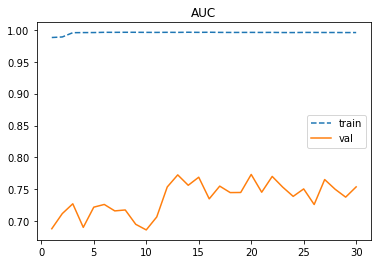

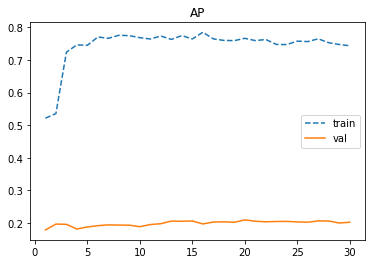

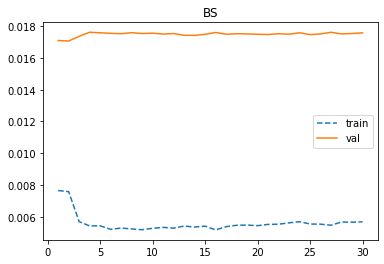

In [129]:
grid = np.arange(1,n_feat+ 1,1)

plt.title('AUC')
plt.plot(grid, AUC_train_list, '--', label = 'train')
plt.plot(grid, AUC_val_list,  '-', label = 'val')
plt.legend()
plt.show()

plt.title('AP')
plt.plot(grid, AP_train_list, '--', label = 'train')
plt.plot(grid, AP_val_list, '-', label = 'val')

plt.legend()
plt.show()

plt.title('BS')
plt.plot(grid, BS_train_list, '--', label = 'train')
plt.plot(grid, BS_val_list, '-', label = 'val')
plt.legend()
plt.show()

# forward feature selection


In [ ]:
# forward feature selection

# start wiht n models where n = number of features. 
# choose the model with the highste AP
# create n-1 models with the feature from the first model and one new feature
# choose the model with the highste AP
# create n-2 models with the two features from the second model and one new feature
# repeat
# contiue until no improvement.


In [208]:
chosen_features = []
chosen_features_ap = []

for j in range(n_feat): # det her skal jo egen ligt være et while loop - while improving

    x_list = []
    AP_val_list = []

    mask = np.isin(X_train.columns, choosen_features, invert = True)
    n_i = mask.sum()
    for i, x in enumerate(X_train.columns[mask]): # is the index of the (new) feature tested

        #x = X_train.columns[i]
        X_temp = choosen_features + [x]

        print(f'Running with: {X_temp}. {i+1}/{n_i}')

        #model_tmp = RandomForestClassifier(n_estimators=110, max_depth = 4, min_samples_split = 3, random_state=42, n_jobs= 4)
        model_tmp = RandomForestClassifier(n_estimators=10, max_depth = 4, min_samples_split = 2, random_state=42, n_jobs= 4) # for speed.. 

        model_tmp.fit(X_train[X_temp], y_train)

        y_train_pred = model_tmp.predict_proba(X_train[X_temp])[:,1]
        y_val_pred = model_tmp.predict_proba(X_test[X_temp])[:,1]

        x_list.append(x)
        AP_train_list.append(metrics.average_precision_score(y_train, y_train_pred))
        AP_val_list.append(metrics.average_precision_score(y_test, y_val_pred))

        print(f'train: {AP_train_list[i]}, test: {AP_val_list[i]}\n')

    df_temp = pd.DataFrame({'x': x_list, 'AP': AP_val_list})
    chosen_features.append(df_temp.sort_values('AP', ascending= False).iloc[0]['x'])
    chosen_features_ap.append(df_temp.sort_values('AP', ascending= False).iloc[0]['AP'])

    print(f'round {j+1}/{n_feat}. choosenfeatures: {chosen_features} w/ AP: {chosen_features_ap[j]}\n\n')

    # the break sould be here somewhere...



_mass', 'dce_mu_s', 'cm_mu_s', 'dce_mu_l', 'cm_mu_l_acc', 'cm_mu_l_mass', 'cm_mu_s_slope', 'dce_mu_acc', 'cm_mu', 'cm_mu_l_slope', 'dce_mu_s_mass', 'cm_mu_s_acc', 'dce_mu_slope', 'cm_mu_slope', 'dce_mu_s_slope', 'cm_mu_s_mass', 'dce_mu_mass', 'dce_mu_l_mass', 'cm_var_l']. 9/9
train: 0.7749520573173164, test: 0.18532973807263264

round 22/30. choosenfeatures: ['cm_mu_l', 'dce_mu', 'dce_mu_s_acc', 'cm_mu_mass', 'dce_mu_s', 'cm_mu_s', 'dce_mu_l', 'cm_mu_l_acc', 'cm_mu_l_mass', 'cm_mu_s_slope', 'dce_mu_acc', 'cm_mu', 'cm_mu_l_slope', 'dce_mu_s_mass', 'cm_mu_s_acc', 'dce_mu_slope', 'cm_mu_slope', 'dce_mu_s_slope', 'cm_mu_s_mass', 'dce_mu_mass', 'dce_mu_l_mass', 'dce_mu_l_slope'] w/ AP: 0.18535763314872208


Running with: ['cm_mu_l', 'dce_mu', 'dce_mu_s_acc', 'cm_mu_mass', 'dce_mu_s', 'cm_mu_s', 'dce_mu_l', 'cm_mu_l_acc', 'cm_mu_l_mass', 'cm_mu_s_slope', 'dce_mu_acc', 'cm_mu', 'cm_mu_l_slope', 'dce_mu_s_mass', 'cm_mu_s_acc', 'dce_mu_slope', 'cm_mu_slope', 'dce_mu_s_slope', 'cm_mu_s_mass', 'd

In [178]:
# Check lige DCE mp: hvor lang er /ell_s?

yep


In [211]:
best_features = pd.DataFrame({'features' : choosen_features, 'AP' : choosen_features_ap})
best_features

,features,AP
0,cm_mu_l,0.175666
1,dce_mu,0.202072
2,dce_mu_s_acc,0.217463
3,cm_mu_mass,0.212548
4,dce_mu_s,0.214284
5,cm_mu_s,0.204905
6,dce_mu_l,0.214219
7,cm_mu_l_acc,0.208175
8,cm_mu_l_mass,0.210690
9,cm_mu_s_slope,0.209179


In [200]:
list_t = ['dce_mu']

mask = np.isin(X_train.columns, list_t, invert = True)
for i in X_train.columns[mask]:
    print(i)

dce_mu_slope
dce_mu_acc
dce_mu_mass
dce_mu_s
dce_mu_s_slope
dce_mu_s_acc
dce_mu_s_mass
dce_mu_l
dce_mu_l_slope
dce_mu_l_acc
dce_mu_l_mass
dce_var
dce_var_s
dce_var_l
cm_mu
cm_mu_slope
cm_mu_acc
cm_mu_mass
cm_mu_s
cm_mu_s_slope
cm_mu_s_acc
cm_mu_s_mass
cm_mu_l
cm_mu_l_slope
cm_mu_l_acc
cm_mu_l_mass
cm_var
cm_var_s
cm_var_l


array([False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [182]:
list(X_train.columns)

['dce_mu',
 'dce_mu_slope',
 'dce_mu_acc',
 'dce_mu_mass',
 'dce_mu_s',
 'dce_mu_s_slope',
 'dce_mu_s_acc',
 'dce_mu_s_mass',
 'dce_mu_l',
 'dce_mu_l_slope',
 'dce_mu_l_acc',
 'dce_mu_l_mass',
 'dce_var',
 'dce_var_s',
 'dce_var_l',
 'cm_mu',
 'cm_mu_slope',
 'cm_mu_acc',
 'cm_mu_mass',
 'cm_mu_s',
 'cm_mu_s_slope',
 'cm_mu_s_acc',
 'cm_mu_s_mass',
 'cm_mu_l',
 'cm_mu_l_slope',
 'cm_mu_l_acc',
 'cm_mu_l_mass',
 'cm_var',
 'cm_var_s',
 'cm_var_l']

In [171]:
a

'cm_mu_l'

In [ ]:
choosen_features = []

x_list = []
AP_val_list = []

for i in range(n_feat): # is the index of the (new) feature tested

    x = X_train.columns[i]
    X_temp = choosen_features + [x]

    print(f'Running with: {X_temp}')

    #model_tmp = RandomForestClassifier(n_estimators=110, max_depth = 4, min_samples_split = 3, random_state=42, n_jobs= 4)
    model_tmp = RandomForestClassifier(n_estimators=10, max_depth = 4, min_samples_split = 2, random_state=42, n_jobs= 4) # for speed.. 

    model_tmp.fit(X_train[X_temp], y_train)

    y_train_pred = model_tmp.predict_proba(X_train[X_temp])[:,1]
    y_val_pred = model_tmp.predict_proba(X_test[X_temp])[:,1]

    x_list.append(x)
    AP_train_list.append(metrics.average_precision_score(y_train, y_train_pred))
    AP_val_list.append(metrics.average_precision_score(y_test, y_val_pred))

    print(f'train: {AP_train_list[i]}, test: {AP_val_list[i]}\n')
    
    choosen_features.append(df_temp.sort_values('AP', ascending= False).iloc[0])

print(choosen_features)

In [ ]:

choosen_features = [] # this will automatically give the number of features in the modl

AP_train_list = []
AP_val_list = []

x_list = []

for i in range(n_feat): # is the index of the (new) feature tested

    x = X_train.columns[i]
    x_list = []

    X_temp = choosen_features + [x]


    model_tmp = RandomForestClassifier(n_estimators=110, max_depth = 4, min_samples_split = 3, random_state=42, n_jobs= 4)
    model_tmp.fit(X_train[X_temp], y_train)
    
    y_train_pred = model_tmp.predict_proba(X_train[X_temp])[:,1]
    y_val_pred = model_tmp.predict_proba(X_val[X_temp])[:,1]

    AP_train_list.append(metrics.average_precision_score(y_train, y_train_pred))
    AP_val_list.append(metrics.average_precision_score(y_test, y_val_pred))







    # for j in range(n_feat): # j is the new ffeature added





In [ ]:
for i in np.arange(1, n_feat + 1, 1):

    X_sub = X_train[]
